[*********************100%***********************]  100 of 100 completed

23 Failed downloads:
['7225.T', '7232.T', '7258.T', '7223.T', '7221.T', '7237.T', '7243.T', '7262.T', '7233.T', '7260.T', '7263.T', '7234.T', '7257.T', '7248.T']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y)')
['7230.T', '7251.T', '7249.T', '7207.T', '7253.T', '7252.T', '7216.T', '7227.T', '7209.T']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")')
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/7207.T?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=7207.T&crumb=fBZwWV695fh
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/7209.T?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%

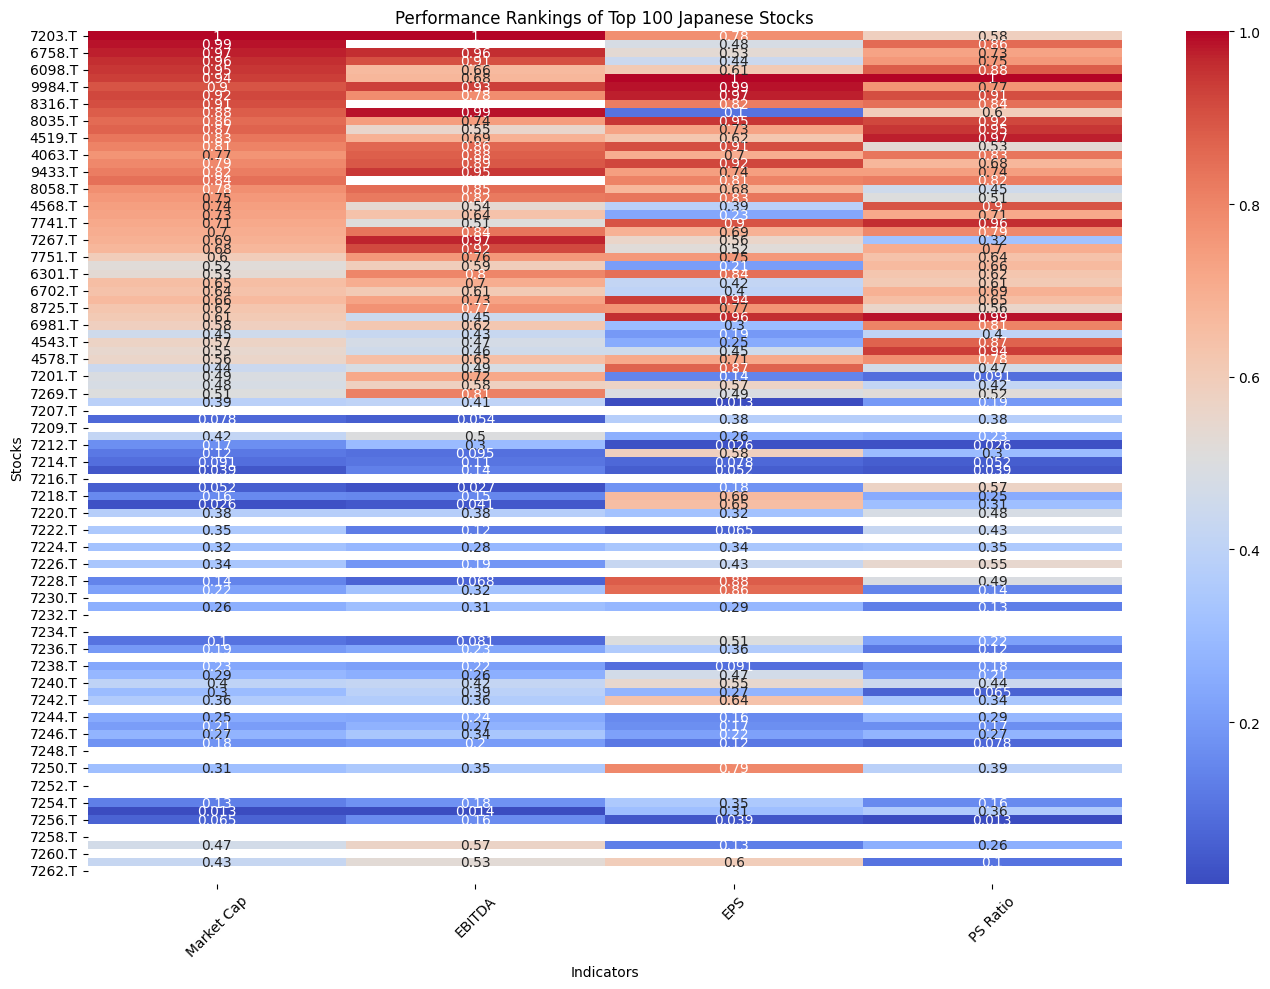

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# List of the biggest 100 stocks in Japan (example tickers)
tickers = ['7203.T', '8306.T', '6758.T', '6501.T', '6098.T', '6861.T', '9984.T', '9983.T', '8316.T', '9432.T', 
           '8035.T', '7974.T', '4519.T', '8001.T', '4063.T', '8766.T', '9433.T', '8411.T', '8058.T', '8031.T', 
           '4568.T', '7011.T', '7741.T', '2914.T', '7267.T', '4502.T', '7751.T', '4901.T', '6301.T', '6503.T', 
           '6702.T', '6367.T', '8725.T', '6146.T', '6981.T', '7752.T', '4543.T', '6954.T', '4578.T', '6305.T', 
           '7201.T', '7202.T', '7269.T', '7205.T', '7207.T', '7208.T', '7209.T', '7211.T', '7212.T', '7213.T', 
           '7214.T', '7215.T', '7216.T', '7217.T', '7218.T', '7219.T', '7220.T', '7221.T', '7222.T', '7223.T', 
           '7224.T', '7225.T', '7226.T', '7227.T', '7228.T', '7229.T', '7230.T', '7231.T', '7232.T', '7233.T', 
           '7234.T', '7235.T', '7236.T', '7237.T', '7238.T', '7239.T', '7240.T', '7241.T', '7242.T', '7243.T', 
           '7244.T', '7245.T', '7246.T', '7247.T', '7248.T', '7249.T', '7250.T', '7251.T', '7252.T', '7253.T', 
           '7254.T', '7255.T', '7256.T', '7257.T', '7258.T', '7259.T', '7260.T', '7261.T', '7262.T', '7263.T']

# Fetch data from Yahoo Finance
data = yf.download(tickers, period='1y', interval='1d')

# Calculate required indicators
indicators = pd.DataFrame(index=tickers)
indicators['Market Cap'] = [yf.Ticker(ticker).info.get('marketCap', np.nan) for ticker in tickers]
indicators['EBITDA'] = [yf.Ticker(ticker).info.get('ebitda', np.nan) for ticker in tickers]
indicators['EPS'] = [yf.Ticker(ticker).info.get('trailingEps', np.nan) for ticker in tickers]
indicators['PS Ratio'] = [yf.Ticker(ticker).info.get('priceToSalesTrailing12Months', np.nan) for ticker in tickers]

# Convert indicators to percentiles
percentiles = indicators.rank(pct=True)

# Visualization
plt.figure(figsize=(14, 10))
sns.heatmap(percentiles, annot=True, cmap='coolwarm', cbar=True)
plt.title('Performance Rankings of Top 100 Japanese Stocks')
plt.xlabel('Indicators')
plt.ylabel('Stocks')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()